In [73]:
#Import Dataframes
import pandas as pd

df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df2 = pd.read_csv("time_series_covid19_deaths_global.csv")
df3 = pd.read_csv("time_series_covid19_recovered_global.csv")
population_df=pd.read_csv("Population.csv")

In [168]:
#Bevölkerung 2020 
pop2020_df=population_df[(population_df["Time"]==2020)
                                &(population_df["Variant"]=="Medium")
                                &(population_df["LocID"]<=894)]

#relevante spalten und länder als index
pop_df=pop2020_df[["Location","PopTotal"]].set_index("Location")

#poptotal *1000 
pop_df["PopTotal"]=pop_df["PopTotal"]*1000

#korrektur Ländernamen
index_list=pop_df.index.tolist()
wrong_names=["Bolivia (Plurinational State of)","Brunei Darussalam","Myanmar","Democratic Republic of the Congo","Congo",
             "Côte d'Ivoire","Iran (Islamic Republic of)","Republic of Korea","Lao People's Democratic Republic",
            "Republic of Moldova","Russian Federation","Syrian Arab Republic","China, Taiwan Province of China",
            "United Republic of Tanzania","United States of America","Venezuela (Bolivarian Republic of)","Viet Nam",
            "State of Palestine"]

right_names=["Bolivia","Brunei","Burma","Congo (Kinshasa)","Congo (Brazzaville)","Cote d'Ivoire","Iran","Korea, South",
             "Laos","Moldova","Russia","Syria","Taiwan*","Tanzania","US","Venezuela","Vietnam","West Bank and Gaza"]

for wrong, right in zip(wrong_names,right_names):
    idx=index_list.index(wrong)
    index_list[idx]=right
    
pop_df.index=index_list
#fertiger df mit Bevölkerungszahlen aller Länder in 2020
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PopTotal  235 non-null    float64
dtypes: float64(1)
memory usage: 3.7+ KB


In [74]:
#Lat, Long in allen Droppen
df.drop(['Lat', 'Long'],axis=1, inplace=True)
df2.drop(['Lat', 'Long'],axis=1, inplace=True)
df3.drop(['Lat', 'Long'],axis=1, inplace=True)



df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [88]:
#Provinzen raus

countries = df.groupby("Country/Region").sum()
countries2 = df2.groupby("Country/Region").sum()
countries3 = df3.groupby("Country/Region").sum()



countries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
Albania,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
Algeria,0,0,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
Andorra,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [37]:



#Transform Row/Columns

confirmed = countries.T
death = countries2.T
recovered = countries3.T

confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [38]:
# DateTimeIndex setzen

confirmed.index = pd.DatetimeIndex(confirmed.index, name='Date', freq='D')
death.index = pd.DatetimeIndex(death.index, name='Date', freq='D')
recovered.index = pd.DatetimeIndex(recovered.index, name='Date', freq='D')


confirmed.index 

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [79]:
confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [40]:
death.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [41]:
death.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
recovered.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq='D')

In [76]:
recovered.head()


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
#skalierung von confirmed, death und recovered
#kopien der unskalierten daten
recovered_scaled=recovered.copy()
death_scaled=death.copy()
confirmed_scaled=confirmed.copy()


#fehlende Daten bzw Kreuzfahrtschiffe löschen
recovered_scaled.drop(columns=["Diamond Princess","Kosovo","MS Zaandam"],inplace=True) 
death_scaled.drop(columns=["Diamond Princess","Kosovo","MS Zaandam"],inplace=True)
confirmed_scaled.drop(columns=["Diamond Princess","Kosovo","MS Zaandam"],inplace=True)


print(recovered_scaled["US"])
print(pop_df.loc["US"])
print(recovered_scaled["US"]/(pop_df.loc["US"].values))

#skalierung
for country in recovered_scaled.columns:
    recovered_scaled[country]=recovered_scaled[country]/pop_df.loc[country].values*100000
    
for country in recovered_scaled.columns:
    death_scaled[country]=death_scaled[country]/pop_df.loc[country].values*100000
    
for country in recovered_scaled.columns:
    confirmed_scaled[country]=confirmed_scaled[country]/pop_df.loc[country].values*10000
    
    
print(confirmed_scaled["US"])

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-05-18    283178
2020-05-19    289392
2020-05-20    294312
2020-05-21    298418
2020-05-22    350135
Freq: D, Name: US, Length: 122, dtype: int64
PopTotal    331002647.0
Name: US, dtype: float64
Date
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.000000
                ...   
2020-05-18    0.000856
2020-05-19    0.000874
2020-05-20    0.000889
2020-05-21    0.000902
2020-05-22    0.001058
Freq: D, Name: US, Length: 122, dtype: float64
Date
2020-01-22     0.000030
2020-01-23     0.000030
2020-01-24     0.000060
2020-01-25     0.000060
2020-01-26     0.000151
                ...    
2020-05-18    45.567853
2020-05-19    46.179933
2020-05-20    46.883402
2020-05-21    47.647565
2020-05-22    48.366290
Freq: D, Name: US, Length: 122, dtype: float64


In [30]:
#import zur Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Please enter country : Germany


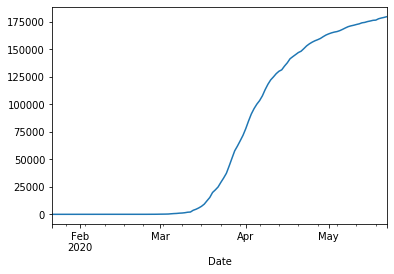

In [25]:
#Land auswählen und Entwicklung confirmed sehen
country = input("Please enter country : ")


confirmed[country].plot()

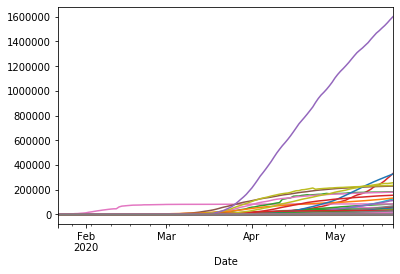

In [13]:
#alle Länder
confirmed.plot(legend=None)


Please enter country : Germany


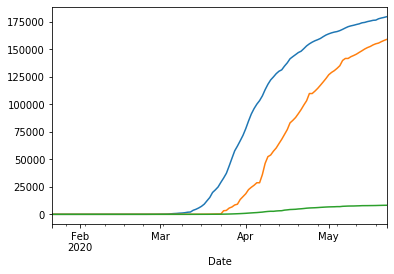

In [14]:
#Entwicklung eines Landes in allen 3 DataFrames
choose = input ("Please enter country : ")
confirmed[country].plot()
recovered[country].plot()
death[country].plot()

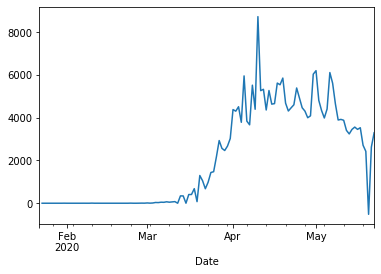

In [27]:
#Versuch Wachstumsrate

#Copy DataFrame

conf = confirmed.copy()

#DataFrame um einen Tag verschieben

confs = conf.shift(1)
confs

#DataFrame subtrahieren

Change = conf - confs

Change

Change['United Kingdom'].plot()



In [26]:
Change


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,408.0,2.0,182.0,0.0,2.0,0.0,303.0,351.0,14.0,27.0,...,2714.0,3.0,38.0,77.0,4.0,7.0,0.0,2.0,8.0,2.0
2020-05-19,581.0,1.0,176.0,0.0,2.0,0.0,438.0,218.0,4.0,52.0,...,2429.0,1.0,64.0,131.0,0.0,3.0,0.0,37.0,11.0,0.0
2020-05-20,492.0,15.0,165.0,1.0,0.0,0.0,474.0,230.0,9.0,32.0,...,-519.0,8.0,84.0,75.0,0.0,7.0,0.0,17.0,60.0,2.0


In [16]:
#wöchentliche Zahlen

w = Change.copy()

#Resample auf Woche
weekly =w.resample('W').sum()


In [17]:
weekly


Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.0,14.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,3.0,0.0,18.0,1.0,0.0,0.0,12.0,0.0,49.0,90.0,...,238.0,0.0,0.0,0.0,14.0,16.0,0.0,0.0,0.0,0.0
2020-03-15,12.0,42.0,29.0,0.0,0.0,1.0,33.0,25.0,221.0,756.0,...,871.0,8.0,1.0,10.0,26.0,22.0,0.0,0.0,0.0,0.0
2020-03-22,24.0,47.0,153.0,112.0,2.0,0.0,221.0,168.0,1252.0,2722.0,...,4600.0,150.0,42.0,60.0,57.0,14.0,0.0,0.0,3.0,3.0


In [33]:
recovered.loc['2020-04-12']

Country/Region
Afghanistan            32
Albania               217
Algeria               591
Andorra               128
Angola                  4
                     ... 
West Bank and Gaza     58
Western Sahara          0
Yemen                   0
Zambia                 30
Zimbabwe                0
Name: 2020-04-12 00:00:00, Length: 188, dtype: int64

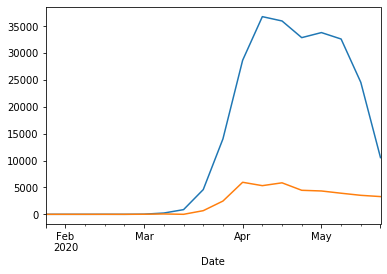

In [18]:
#Woche shiften und Differenz ausrechnen

weekly['United Kingdom'].plot()
Change['United Kingdom'].plot()
#wöchentliche Wachstumsrate

In [19]:
#Versuch Todesrate --> Todesrate = Tote/Infizierte*100  

deathrate = (death/confirmed)*100

deathrate

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-18,2.446267,3.270042,7.707263,6.701708,6.000000,12.0,4.563374,1.264773,1.400679,3.866249,...,14.079424,2.713704,0.465783,1.618123,0.0,0.515464,0.0,15.384615,0.919842,8.695652
2020-05-19,2.325885,3.266596,7.604717,6.701708,5.769231,12.0,4.461346,1.269589,1.414027,3.872312,...,14.160983,2.710027,0.455342,1.335113,0.0,0.511509,0.0,16.766467,0.906736,8.695652
2020-05-20,2.295887,3.215768,7.531159,6.692913,5.769231,12.0,4.341269,1.271106,1.412230,3.870849,...,14.336248,2.680965,0.442327,1.213592,0.0,0.502513,0.0,16.304348,0.841346,8.333333


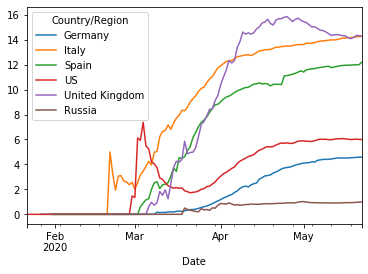

In [20]:
deathrate.plot(y=['Germany', 'Italy', 'Spain', 'US', 'United Kingdom', 'Russia'])

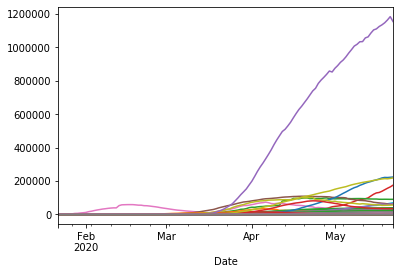

In [34]:
#aktuell Infizierte

infected = confirmed - recovered - death

infected.plot(legend=None)

In [22]:
infected['US']

Date
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
               ...   
2020-05-18    1225130
2020-05-19    1239176
2020-05-20    1257541
2020-05-21    1278729
2020-05-22    1250802
Freq: D, Name: US, Length: 122, dtype: int64

In [23]:
confirmed['US']

Date
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
               ...   
2020-05-18    1508308
2020-05-19    1528568
2020-05-20    1551853
2020-05-21    1577147
2020-05-22    1600937
Freq: D, Name: US, Length: 122, dtype: int64

In [24]:
recovered['US']

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-05-18    283178
2020-05-19    289392
2020-05-20    294312
2020-05-21    298418
2020-05-22    350135
Freq: D, Name: US, Length: 122, dtype: int64